1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.interpolate import interp1d
from scipy.stats import gamma
import random

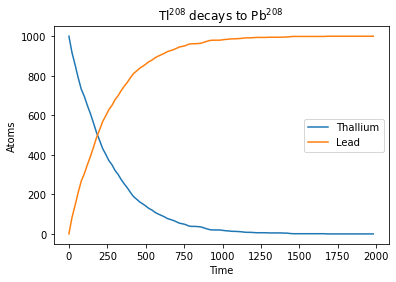

In [2]:
tau = 3.052 * 60 #measure in seconds
N = 1000 #starting values of sample
t = 2000 #at this value we reach the stability
step = 100 #steps in time of 1s

def monte_carlo(N, t, step):
    dt = t / step
    thallium = np.zeros(step)
    lead = np.zeros(step)
    atoms = np.ones(N)
    p_tha = 1 - 2**(-dt/tau)
    for i in range(step):
        thallium[i] = atoms.sum()
        lead[i] = N-atoms.sum()
        for i2 in range(N):
            if atoms[i2] == 1: #deciding whether the given atom should decay
                if random.random() <= p_tha:
                    atoms[i2] = 0
                else:
                    atoms[i2] = 1
    return thallium,lead

time = np.arange(0, t, t/step)
thallium, lead = monte_carlo(N, t, step)
plt.plot(time, thallium, label = 'Thallium')
plt.plot(time, lead, label = 'Lead')
plt.title('$\mathrm{Tl}^{208}$ decays to $\mathrm{Pb}^{208}$')
plt.ylabel('Atoms')
plt.xlabel('Time')
plt.legend() 
plt.show()

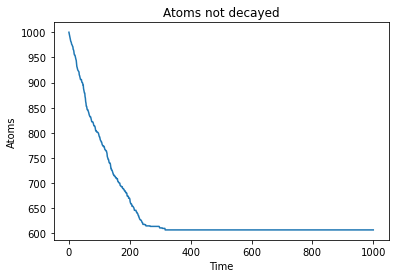

In [3]:
def inverse(t):
    return -tau*np.log2(1-t)
    
tau = 3.052 * 60
N=1000
steps = inverse(np.random.random(N))
count = np.zeros(N)
steps = np.sort(steps)
i = 0
for step in steps:
    if step <= i:
        count[i] += 1
    else: 
        i += 1
x = np.linspace(0,N,N)
not_decay = N - np.cumsum(count)
plt.plot(x, not_decay)
plt.title('Atoms not decayed')
plt.ylabel('Atoms')
plt.xlabel('Time') 
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/miss method:
   The integral is  1.34726
   The error is  0.002965485613520996


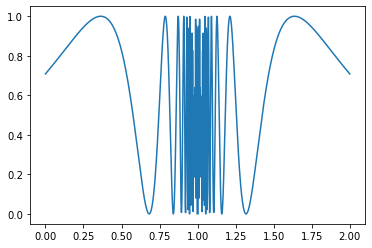

Mean value method:
   The integral is  1.345800349651674
   The error is  0.0020710529929842147
the ratio is:  0.6983857832731823


In [4]:
def f(x):
    return (np.sin(1/(1-x)))**2
            
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
I = 2 * count / N
p = count/N
err = 2*np.sqrt(N*p*(1-p))/N
x = np.linspace(0,2,1000)
print("Hit/miss method:")
print("   The integral is ",I)
print("   The error is ",err)
plt.plot(x,f(x))
plt.show()
random_arr = np.array([f(np.random.uniform(0, 2)) for i in range(N)])
I2 = (2/N)*sum(random_arr)
err2 = 2*np.sqrt(sum(random_arr**2)/N - (sum(random_arr)/N)**2)/np.sqrt(N)
print("Mean value method:")
print("   The integral is ",I2)
print("   The error is ",err2)
compare = err2/err 
print("the ratio is: ",compare)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
def area(N, dim):
    _in = 0
    counts = 0
    points = N*dim
    for i in range(points):
        coord = np.array([(np.random.uniform(-1, 1)) for i in range(dim)]) #coordinates on columns
        dist = sum(map(lambda x:x*x, coord))
        if dist <= 1: 
            _in += 1
        counts += 1
    return (2**dim)*_in/counts
N = 10000
print("result for circle",area(N,2))
print("result for 10D sphere",area(N,10))

result for circle 3.1518
result for 10D sphere 2.44736


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [6]:
def f(x):
    return (x**(-0.5)/(np.exp(x)+1))
def w(x): 
    return 1/np.sqrt(x)

N = 100000
I2 = np.zeros(N)
I = np.zeros(N)
for i in range(N):
    x = (np.random.random())**2    
    I[i] = f(x)
    I2[i] = w(x)
H_mc = (1/N)*np.sum(I/I2)*2
print(H_mc)


0.8388287562138136
